In [164]:
#importing libreries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [166]:
#loading the data
dataset = pd.read_csv('garments_worker_productivity.csv')

In [168]:
#doing EDA

In [170]:
dataset.shape

(1197, 15)

In [172]:
dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [174]:
dataset.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


In [176]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [178]:
dataset.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [180]:
#filling null values
dataset['wip'] = dataset['wip'].fillna(0)

In [182]:
#checking, the null values have filled corectly.
print(dataset.isnull().sum())

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [184]:
# Encode 'quarter' and 'department' as numeric categories
le_quarter = LabelEncoder()
le_department = LabelEncoder()
dataset['quarter'] = le_quarter.fit_transform(dataset['quarter'])
dataset['department'] = le_department.fit_transform(dataset['department'])

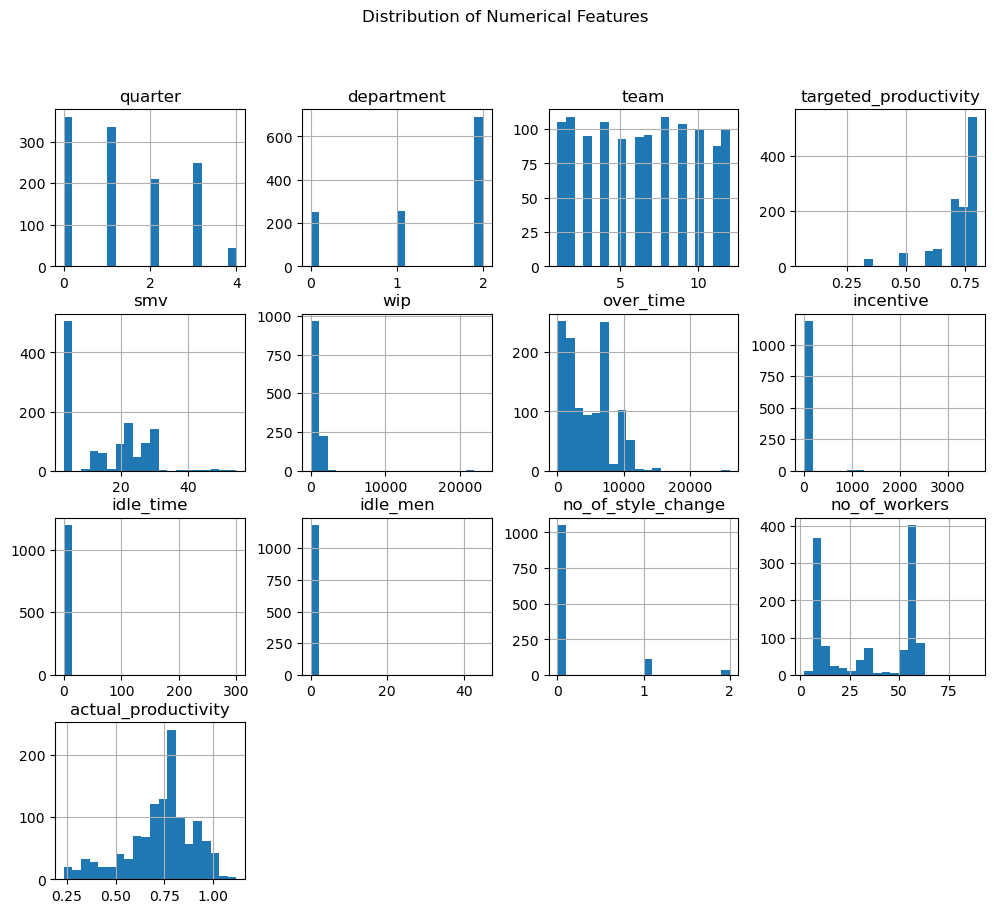

In [186]:
# Ploting histograms for numerical features
numerical_columns = dataset.select_dtypes(include=[np.number]).columns
dataset[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()

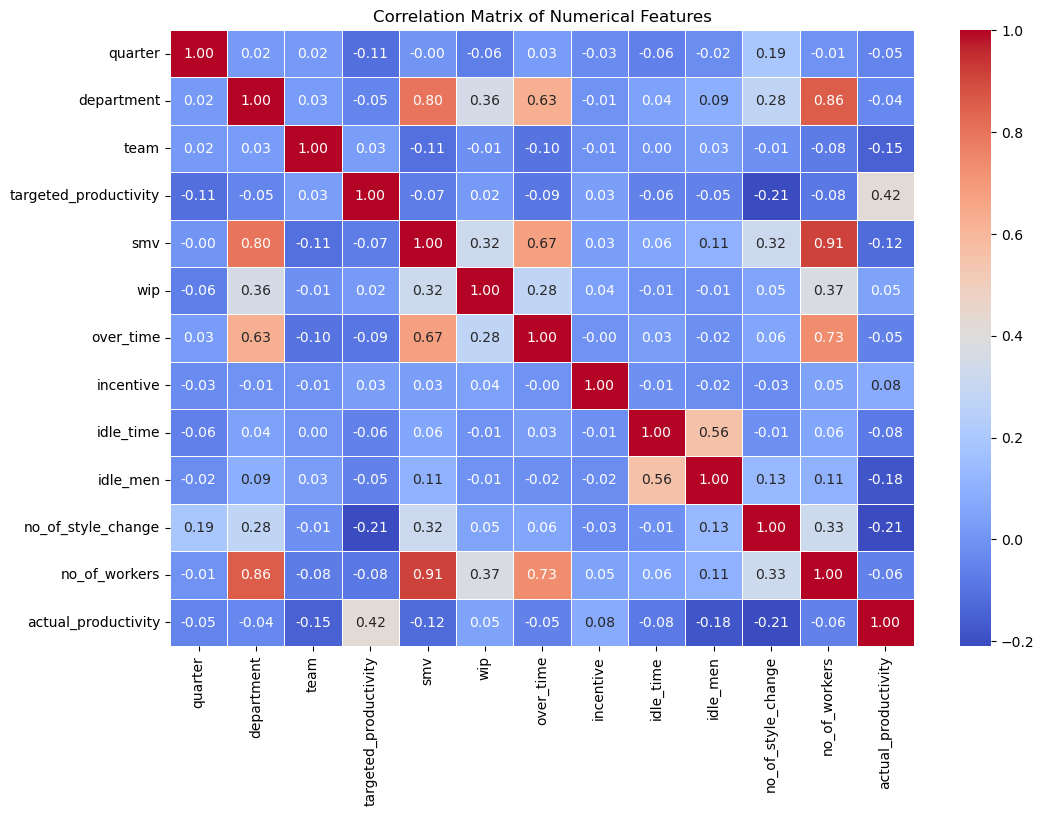

In [187]:
#corrilation metrix
correlation_matrix = dataset[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

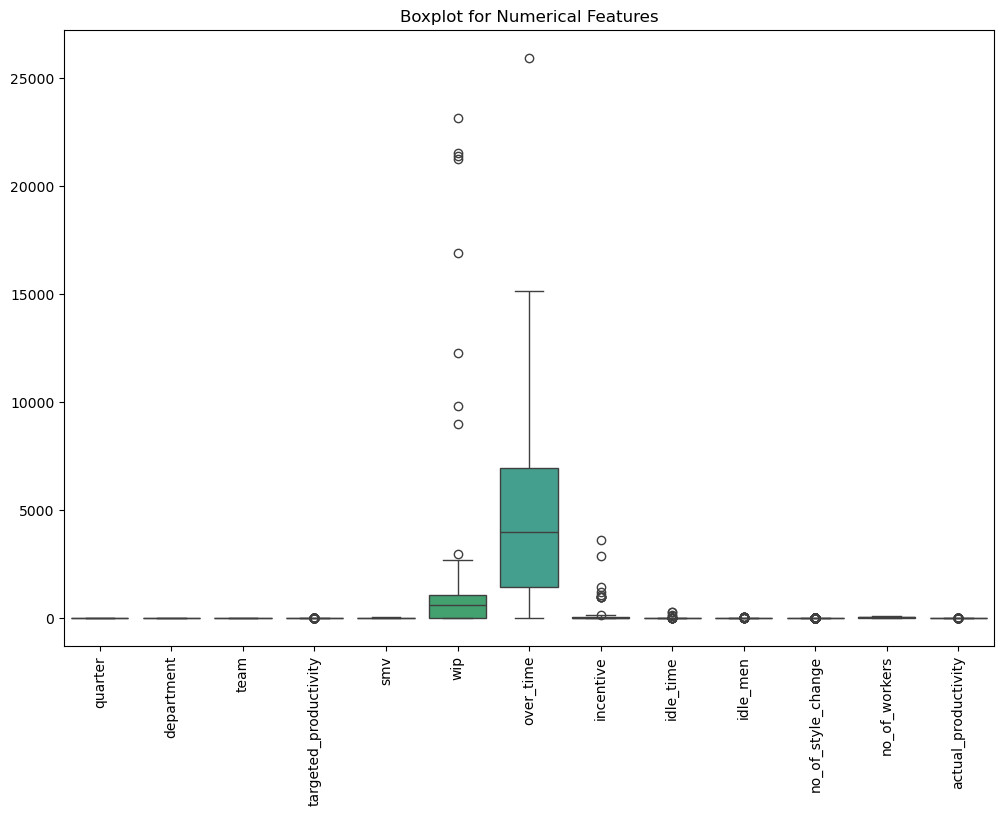

In [188]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset[numerical_columns])
plt.title("Boxplot for Numerical Features")
plt.xticks(rotation=90)
plt.show()

In [192]:
# creating a Function to handle outliers using IQR
def handle_outliers(dataset, numerical_columns):
    for column in numerical_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define the lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]
        
        print(f"Outliers handled for {column}: Values outside [{lower_bound}, {upper_bound}] removed.")
        
    return dataset


In [194]:
# Select numerical columns
numerical_columns = [
    'team', 'targeted_productivity', 'smv', 'wip', 'over_time',
    'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
    'no_of_workers', 'actual_productivity'
]
# Apply the function to handle outliers
cleaned_dataset = handle_outliers(dataset, numerical_columns)
# Check the summary of the cleaned dataset
cleaned_dataset.describe()

Outliers handled for team: Values outside [-6.0, 18.0] removed.
Outliers handled for targeted_productivity: Values outside [0.5499999999999998, 0.9500000000000002] removed.
Outliers handled for smv: Values outside [-25.685, 53.315] removed.
Outliers handled for wip: Values outside [-1624.5, 2707.5] removed.
Outliers handled for over_time: Values outside [-6750.0, 15090.0] removed.
Outliers handled for incentive: Values outside [-75.0, 125.0] removed.
Outliers handled for idle_time: Values outside [0.0, 0.0] removed.
Outliers handled for idle_men: Values outside [0.0, 0.0] removed.
Outliers handled for no_of_style_change: Values outside [0.0, 0.0] removed.
Outliers handled for no_of_workers: Values outside [-65.5, 130.5] removed.
Outliers handled for actual_productivity: Values outside [0.44056942900000023, 1.1086886449999998] removed.


,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.0,901.0,901.0,901.000000,901.000000
mean,1.291898,1.320755,6.440622,0.757436,13.758335,555.411765,4566.115427,28.108768,0.0,0.0,0.0,32.327414,0.787958
std,1.227568,0.801597,3.582996,0.055329,10.462863,575.630126,3430.241319,32.127374,0.0,0.0,0.0,22.067684,0.125109
min,0.000000,0.000000,1.000000,0.600000,2.900000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.000000,0.441042
25%,0.000000,1.000000,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.0,0.0,0.0,9.000000,0.700618
50%,1.000000,2.000000,6.000000,0.800000,11.610000,470.000000,3840.000000,0.000000,0.0,0.0,0.0,31.500000,0.800261
75%,2.000000,2.000000,10.000000,0.800000,22.520000,1092.000000,6960.000000,50.000000,0.0,0.0,0.0,57.000000,0.870000
max,4.000000,2.000000,12.000000,0.800000,50.890000,1871.000000,15000.000000,119.000000,0.0,0.0,0.0,89.000000,1.108125


In [196]:
# Drop the unnecessary columns
dataset = cleaned_dataset.drop(['idle_time', 'idle_men', 'no_of_style_change'], axis=1)

# Cap the 'actual_productivity' column at 1 (upper limit)
dataset['actual_productivity'] = dataset['actual_productivity'].clip(upper=1.0)

# Print summary to confirm changes
print(dataset.describe())

          quarter  department        team  targeted_productivity         smv  \
count  901.000000  901.000000  901.000000             901.000000  901.000000   
mean     1.291898    1.320755    6.440622               0.757436   13.758335   
std      1.227568    0.801597    3.582996               0.055329   10.462863   
min      0.000000    0.000000    1.000000               0.600000    2.900000   
25%      0.000000    1.000000    3.000000               0.700000    3.940000   
50%      1.000000    2.000000    6.000000               0.800000   11.610000   
75%      2.000000    2.000000   10.000000               0.800000   22.520000   
max      4.000000    2.000000   12.000000               0.800000   50.890000   

               wip     over_time   incentive  no_of_workers  \
count   901.000000    901.000000  901.000000     901.000000   
mean    555.411765   4566.115427   28.108768      32.327414   
std     575.630126   3430.241319   32.127374      22.067684   
min       0.000000      0.0

In [198]:
dataset = dataset.drop(columns=['date', 'day', 'quarter','department'])

In [200]:
correlation_matrix = dataset.corr()
print(correlation_matrix['actual_productivity'].sort_values(ascending=False))


actual_productivity      1.000000
targeted_productivity    0.341870
incentive                0.230527
wip                      0.006487
no_of_workers           -0.017392
over_time               -0.063109
smv                     -0.081843
team                    -0.173062
Name: actual_productivity, dtype: float64


In [204]:
# Define thresholds for classification to create labels
bins = [-float('inf'), 0.7, 0.85, float('inf')]
labels = [0, 1, 2]  # 0: Low, 1: Medium, 2: High

# Create a new target variable
dataset['Productivity_Category'] = pd.cut(dataset['actual_productivity'], bins=bins, labels=labels)


In [206]:
dataset.head()

,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity,Productivity_Category
0,8,0.80,26.16,1108.0,7080,98,59.0,0.940725,2
1,1,0.75,3.94,0.0,960,0,8.0,0.886500,2
2,11,0.80,11.41,968.0,3660,50,30.5,0.800570,1
3,12,0.80,11.41,968.0,3660,50,30.5,0.800570,1
4,6,0.80,25.90,1170.0,1920,50,56.0,0.800382,1


In [208]:
dataset.to_csv("D:/Assesment/dataset.csv", index=False)


In [210]:
dataset['Productivity_Category'].value_counts()

Productivity_Category
1    417
2    299
0    185
Name: count, dtype: int64

In [116]:
dataset.head()

,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity,Productivity_Category
0,8,0.80,26.16,1108.0,7080,98,59.0,0.940725,2
1,1,0.75,3.94,0.0,960,0,8.0,0.886500,2
2,11,0.80,11.41,968.0,3660,50,30.5,0.800570,1
3,12,0.80,11.41,968.0,3660,50,30.5,0.800570,1
4,6,0.80,25.90,1170.0,1920,50,56.0,0.800382,1


In [118]:
# Drop all target variables from X
X = dataset.drop(['actual_productivity', 'Productivity_Category'], axis=1)
y = dataset['Productivity_Category']

In [222]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [230]:
# Apply SMOTE to oversample the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution after SMOTE: Counter({1: 326, 2: 326, 0: 326})


In [232]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train the Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = dtree.predict(X_test)

In [236]:
# Evaluate decision tree model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7513812154696132
Confusion Matrix:
 [[23  7  6]
 [13 75  3]
 [ 7  9 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.64      0.58        36
           1       0.82      0.82      0.82        91
           2       0.81      0.70      0.75        54

    accuracy                           0.75       181
   macro avg       0.72      0.72      0.72       181
weighted avg       0.76      0.75      0.75       181



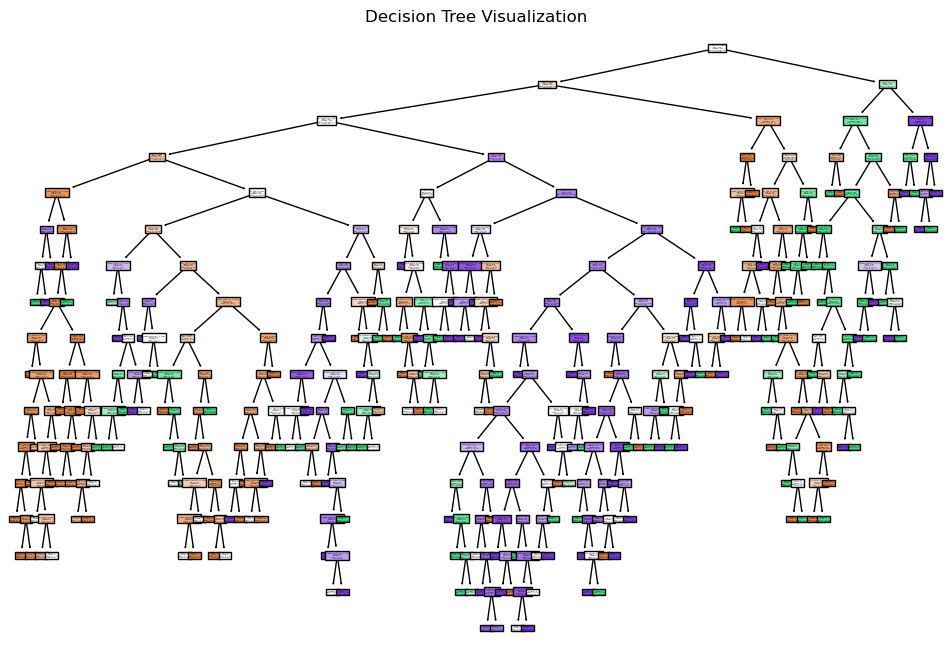

In [238]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Visualize the tree structure
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=list(X.columns), class_names=['Low', 'Medium', 'High'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators = number of trees

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

In [246]:
# Evaluateing random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Random Forest Accuracy: 0.7955801104972375
Confusion Matrix:
 [[24  7  5]
 [ 7 78  6]
 [ 5  7 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        36
           1       0.85      0.86      0.85        91
           2       0.79      0.78      0.79        54

    accuracy                           0.80       181
   macro avg       0.77      0.77      0.77       181
weighted avg       0.80      0.80      0.80       181



In [248]:
import xgboost
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]

stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)

print("Stacking Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Classification Report:\n", classification_report(y_test, y_pred_stacking))


Stacking Accuracy: 0.8121546961325967
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.61      0.65        36
           1       0.86      0.89      0.88        91
           2       0.80      0.81      0.81        54

    accuracy                           0.81       181
   macro avg       0.78      0.77      0.78       181
weighted avg       0.81      0.81      0.81       181

